<a href="https://colab.research.google.com/github/AlejandroVillazonG/mat281_portfolio/blob/master/project/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Calidad del vino** 🍷🍷
MAT281, UTFSM

Integrantes:
*   Alonso Carrasco U.
*   Ernesto Treumún A.
*   Alejandro Villazón G.

##Librerias a usar:

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Lectura de archivos

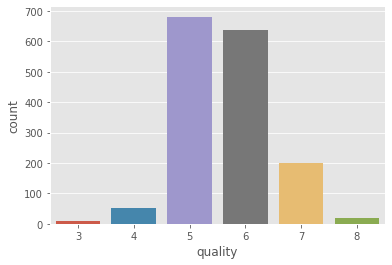

In [ ]:
tintos = pd.read_csv('winequality-red.csv', sep=';')
tintos.columns = tintos.columns.str.lower().str.replace(" ","_")
sns.countplot(tintos["quality"])

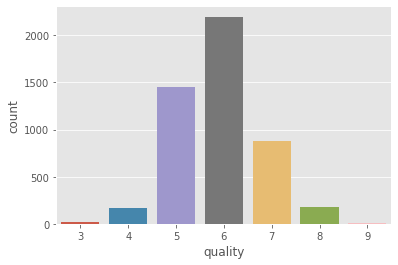

In [ ]:
blancos = pd.read_csv('winequality-white.csv', sep=';')
blancos.columns = blancos.columns.str.lower().str.replace(" ","_")
sns.countplot(blancos["quality"])

##Matrices de correlación

Tintos:

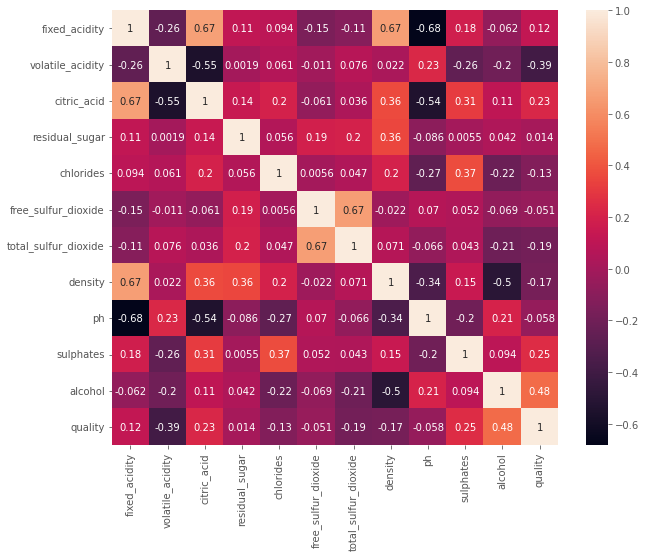

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(tintos.corr(),annot=True)
plt.show()

Blancos:

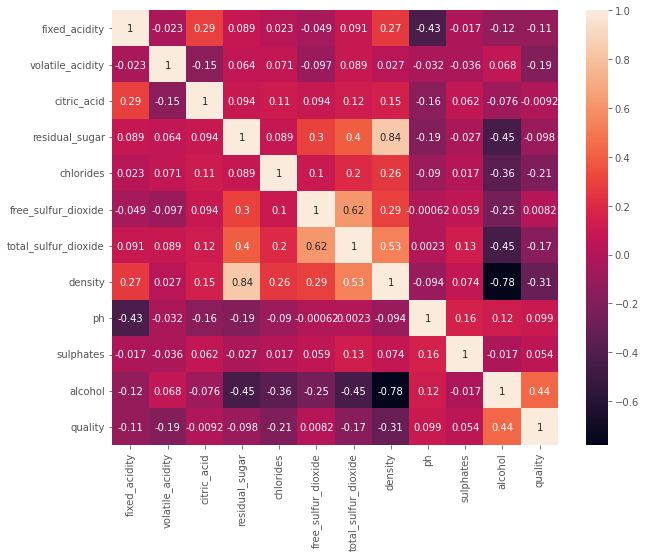

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(blancos.corr(),annot=True)
plt.show()

## Creando una división de las etiquetas

Vinos tintos

In [ ]:
calidad_t = []
for row in tintos["quality"]:
  if row <= 5:
    new = 0
  else:
    new = 1
  calidad_t.append(new)
tintos["new_quality"] = calidad_t

Vinos blancos

In [ ]:
calidad_b = []
for row in blancos["quality"]:
  if row<=5:
    value = 0
  else:
    value = 1
  calidad_b.append(value)
blancos["new_quality"] = calidad_b

##Listas para hacer gráficos de barras

In [ ]:
prec_t = []
prec_b = []

precb_t = []
precb_b = []

AUC_t = []
AUC_b = []

clasificadores = ["K- Vecinos cercanos", "Bayes ingenuo", "Regresión logística", "Análisis de disc. lineal", "Árbol de decisión" ]

## Clasificadores:

Modelos:

In [ ]:
dt = DecisionTreeClassifier()
LR = LogisticRegression()
nb = GaussianNB()
lda = LinearDiscriminantAnalysis()
# KNN = KNeighborsClassifier(n_neighbors=k)

Separamos las covariables de la variable de respuesta:

In [ ]:
Xt = tintos.drop(['quality','new_quality'], axis=1)
yt = tintos['quality']
yt_new = tintos['new_quality']

Xb = blancos.drop(['quality','new_quality'], axis=1)
yb = blancos['quality']
yb_new = blancos['new_quality']

Creamos conjuntos de entrenamiento y de testeo al azar para usar en la validación de 1 iteración con el objetivo de realizar curva ROC y matrices de confusión usando la etiqueta "new_quality"

In [ ]:
#Tintos
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt_new, test_size=0.2, random_state=0)
#Blancos
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb_new, test_size=0.2, random_state=0)

Validación cruzada de 10 iteraciones:

In [ ]:
cv = KFold(n_splits=10)

### K vecinos 👪 🏘

En este modelo en particular es importante elegir una cantidad K de vecinos con los que ajustar el modelo que sea lo más óptima posible. Para eso, simplemente ajustaremos el modelo con varios valores para K y nos quedaremos con el mejor.

Vinos Tintos

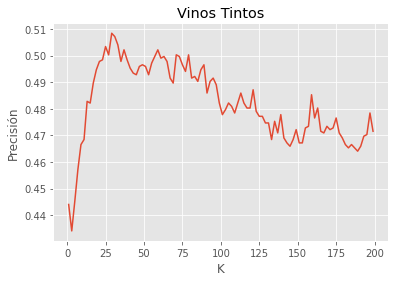

In [ ]:
graficar = [[],[]]
for K in range(1,200,2):
  KNN = KNeighborsClassifier(n_neighbors=K)
  scores_KNN_t = cross_val_score(KNN, Xt, yt, scoring='accuracy', cv=cv, n_jobs=-1)
  graficar[0].append(K)
  graficar[1].append(np.mean(scores_KNN_t))

plt.plot(graficar[0], graficar[1])
plt.title('Vinos Tintos')
plt.ylabel('Precisión')
plt.xlabel('K')
plt.show()

Mejor "K" para ajustar el clasificador

In [ ]:
k_t = graficar[0][graficar[1].index(max(graficar[1]))]
print(k_t)

29


Usando validación cruzada de 10 iteraciones
	Precisión para el caso de 11 etiquetas:  50.84
	Precisión para el caso binario:  64.66
Usando validación de una iteración
	Tasa de aciertos para knn: 68.44%


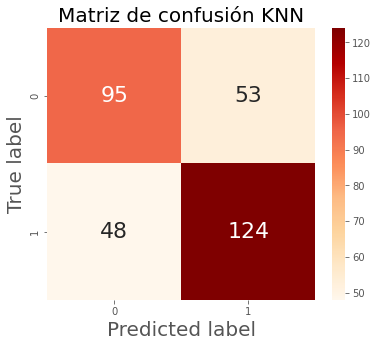

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= k_t)
print("Usando validación cruzada de 10 iteraciones")
score_KNN_t = round(100*np.mean(cross_val_score(KNN, Xt, yt, scoring='accuracy', cv = cv, n_jobs=-1)),2)
score_KNN_t_new = round(100*np.mean(cross_val_score(KNN, Xt, yt_new, scoring='accuracy', cv = cv, n_jobs=-1)),2)
print("\tPrecisión para el caso de 11 etiquetas: ", score_KNN_t)
print("\tPrecisión para el caso binario: ", score_KNN_t_new)

prec_t.append(score_KNN_t)
precb_t.append(score_KNN_t_new)

print("Usando validación de una iteración")
yt_pred_knn = KNN.fit(Xt_train, yt_train).predict(Xt_test)
print("\tTasa de aciertos para knn: " +str(round(accuracy_score(yt_test,yt_pred_knn)*100,2)) + "%")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yt_test,yt_pred_knn),annot=True,cmap=plt.cm.OrRd,fmt="d", annot_kws={'size': 22})
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.title("Matriz de confusión KNN",fontsize=20)
plt.show()

Curva ROC

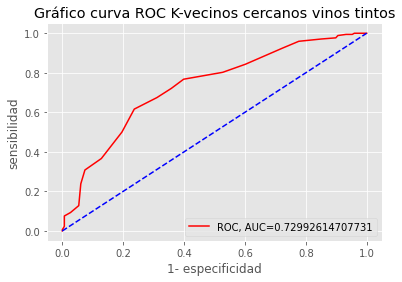

In [ ]:
y_pred_proba = KNN.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = roc_curve(yt_test,  y_pred_proba)
auc = roc_auc_score(yt_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc), color="red")
plt.legend(loc=4)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.plot([0,1], [0,1],"b--")
plt.title("Gráfico curva ROC K-vecinos cercanos vinos tintos")
plt.show()
AUC_t.append(auc)

Vinos blancos

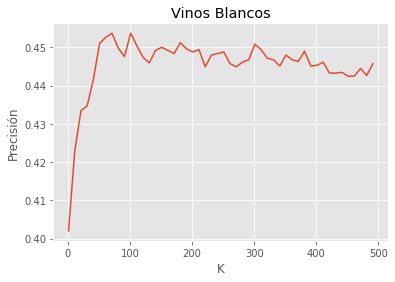

In [ ]:
graficar = [[],[]]
for K in range(1,500,10):
  KNN = KNeighborsClassifier(n_neighbors=K)
  scores_KNN_b = cross_val_score(KNN, Xb, yb, scoring='accuracy', cv=cv, n_jobs=-1)
  graficar[0].append(K)
  graficar[1].append(np.mean(scores_KNN_b))

plt.plot(graficar[0], graficar[1])
plt.title('Vinos Blancos')
plt.ylabel('Precisión')
plt.xlabel('K')
plt.show()   #Nótese que con K=60 aproximadamente se obtienen los mejores resultados

Mejor "K" para ajustar el clasificador

In [ ]:
k_b = graficar[0][graficar[1].index(max(graficar[1]))]
print(k_b)

101


Usando validación cruzada de 10 iteraciones
	Precisión para el caso de 11 etiquetas:  45.37
	Precisión para el caso binario:  65.99
Usando validación de una iteración
	Tasa de aciertos para knn: 64.39%


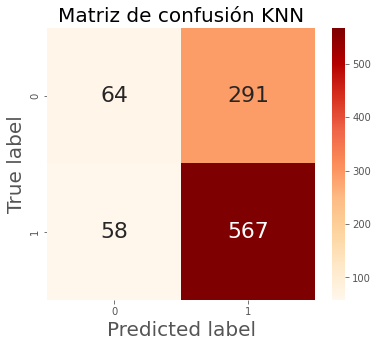

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= k_b)
print("Usando validación cruzada de 10 iteraciones")
score_KNN_b = round(100*np.mean(cross_val_score(KNN, Xb, yb, scoring='accuracy', cv = cv, n_jobs=-1)),2)
score_KNN_b_new = round(100*np.mean(cross_val_score(KNN, Xb, yb_new, scoring='accuracy', cv = cv, n_jobs=-1)),2)
print("\tPrecisión para el caso de 11 etiquetas: ", score_KNN_b)
print("\tPrecisión para el caso binario: ", score_KNN_b_new)

prec_b.append(score_KNN_b)
precb_b.append(score_KNN_b_new)

print("Usando validación de una iteración")
yb_pred_knn = KNN.fit(Xb_train, yb_train).predict(Xb_test)
print("\tTasa de aciertos para knn: " +str(round(accuracy_score(yb_test,yb_pred_knn)*100,2)) + "%")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yb_test,yb_pred_knn),annot=True,cmap=plt.cm.OrRd,fmt="d", annot_kws={'size': 22})
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.title("Matriz de confusión KNN",fontsize=20)
plt.show()

Curva ROC

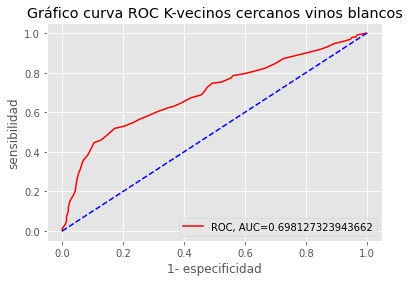

In [ ]:
y_pred_proba = KNN.predict_proba(Xb_test)[::,1]
fpr, tpr, _ = roc_curve(yb_test,  y_pred_proba)
auc = roc_auc_score(yb_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc), color="red")
plt.legend(loc=4)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.plot([0,1], [0,1],"b--")
plt.title("Gráfico curva ROC K-vecinos cercanos vinos blancos")
plt.show()
AUC_b.append(auc)

###Bayes ingenuo 🥴 🤪

Vinos tintos

Usando validación cruzada de 10 iteraciones
	Precisión para el caso de 11 etiquetas:  54.78
	Precisión para el caso binario:  72.29
Usando validación de una iteración
	Tasa de aciertos para NB: 73.12%


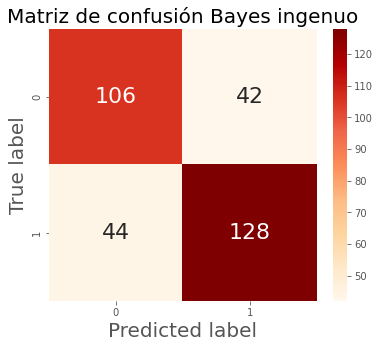

In [ ]:
print("Usando validación cruzada de 10 iteraciones")
score_nb_t = round(100*np.mean(cross_val_score(nb, Xt, yt, scoring='accuracy', cv = cv, n_jobs=-1)),2)
score_nb_t_new =  round(100*np.mean(cross_val_score(nb, Xt, yt_new, scoring='accuracy', cv = cv, n_jobs=-1)),2)
print("\tPrecisión para el caso de 11 etiquetas: ", score_nb_t)
print("\tPrecisión para el caso binario: ", score_nb_t_new)

prec_t.append(score_nb_t)
precb_t.append(score_nb_t_new)

print("Usando validación de una iteración")
yt_pred_nb = nb.fit(Xt_train, yt_train).predict(Xt_test)
print("\tTasa de aciertos para NB: " +str(round(accuracy_score(yt_test,yt_pred_nb)*100,2)) + "%")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yt_test,yt_pred_nb),annot=True,cmap=plt.cm.OrRd,fmt="d", annot_kws={'size':22})
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.title("Matriz de confusión Bayes ingenuo",fontsize=20)
plt.show()

Curva ROC

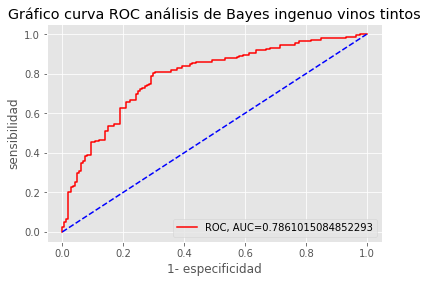

In [ ]:
y_pred_proba = nb.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = roc_curve(yt_test,  y_pred_proba)
auc = roc_auc_score(yt_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc), color="red")
plt.legend(loc=4)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.plot([0,1], [0,1],"b--")
plt.title("Gráfico curva ROC análisis de Bayes ingenuo vinos tintos")
plt.show()
AUC_t.append(auc)

Vinos blancos

Usando validación cruzada de 10 iteraciones
	Precisión para el caso de 11 etiquetas:  43.89
	Precisión para el caso binario:  70.25
Usando validación de una iteración
	Tasa de aciertos para NB: 68.27%


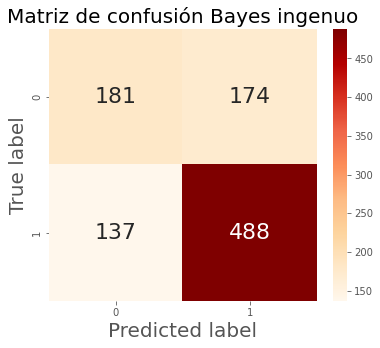

In [ ]:
print("Usando validación cruzada de 10 iteraciones")
scores_nb_b = round(100*np.mean(cross_val_score(nb, Xb, yb, scoring='accuracy', cv = cv, n_jobs=-1)),2)
scores_nb_b_new = round(100*np.mean(cross_val_score(nb, Xb, yb_new, scoring='accuracy', cv = cv, n_jobs=-1)),2)
print("\tPrecisión para el caso de 11 etiquetas: ", scores_nb_b)
print("\tPrecisión para el caso binario: ",scores_nb_b_new) 
prec_b.append(scores_nb_b)
precb_b.append(scores_nb_b_new)

print("Usando validación de una iteración")
yb_pred_nb = nb.fit(Xb_train, yb_train).predict(Xb_test)
print("\tTasa de aciertos para NB: " +str(round(accuracy_score(yb_test,yb_pred_nb)*100,2)) + "%")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yb_test,yb_pred_nb),annot=True,cmap=plt.cm.OrRd,fmt="d", annot_kws={'size':22})
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.title("Matriz de confusión Bayes ingenuo",fontsize=20)
plt.show()

Curva ROC

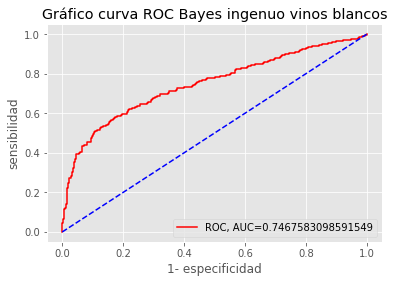

In [ ]:
y_pred_proba = nb.predict_proba(Xb_test)[::,1]
fpr, tpr, _ = roc_curve(yb_test,  y_pred_proba)
auc = roc_auc_score(yb_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc), color="red")
plt.legend(loc=4)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.plot([0,1], [0,1],"b--")
plt.title("Gráfico curva ROC Bayes ingenuo vinos blancos")
plt.show()
AUC_b.append(auc)

###Regresión logística 🤓 🧐

Vinos tintos

Usando validación cruzada de 10 iteraciones
	Precisión para el caso de 11 etiquetas:  57.35
	Precisión para el caso binario:  73.55
Usando validación de una iteración
	Tasa de aciertos para LR: 75.62%


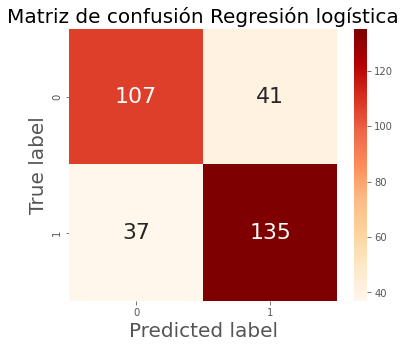

In [ ]:
print("Usando validación cruzada de 10 iteraciones")
scores_RL_t = round(100*np.mean(cross_val_score(LR, Xt, yt, scoring='accuracy', cv = cv, n_jobs=-1)),2)
scores_RL_t_new = round(100*np.mean(cross_val_score(LR, Xt, yt_new, scoring='accuracy', cv = cv, n_jobs=-1)),2)
print("\tPrecisión para el caso de 11 etiquetas: ", scores_RL_t)
print("\tPrecisión para el caso binario: ", scores_RL_t_new)

prec_t.append(scores_RL_t)
precb_t.append(scores_RL_t_new)


print("Usando validación de una iteración")
yt_pred_LR = LR.fit(Xt_train, yt_train).predict(Xt_test)
print("\tTasa de aciertos para LR: " +str(round(accuracy_score(yt_test,yt_pred_LR)*100,2)) + "%")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yt_test,yt_pred_LR),annot=True,cmap=plt.cm.OrRd,fmt="d", annot_kws={'size': 22})
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.title("Matriz de confusión Regresión logística",fontsize=20)
plt.show()

Curva ROC

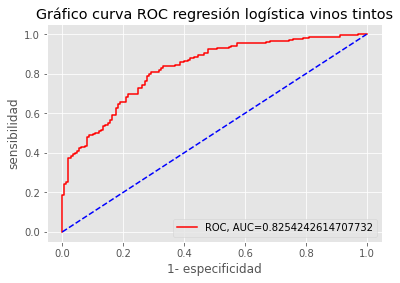

In [ ]:
y_pred_proba = LR.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = roc_curve(yt_test,  y_pred_proba)
auc = roc_auc_score(yt_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc), color="red")
plt.legend(loc=4)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.plot([0,1], [0,1],"b--")
plt.title("Gráfico curva ROC regresión logística vinos tintos")
plt.show()
AUC_t.append(auc)

Vinos blancos

Usando validación cruzada de 10 iteraciones
	Precisión para el caso de 11 etiquetas:  45.86
	Precisión para el caso binario:  74.54
Usando validación de una iteración
	Tasa de aciertos para LR: 72.55%


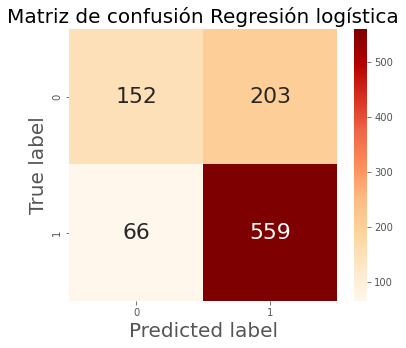

In [ ]:
print("Usando validación cruzada de 10 iteraciones")
scores_RL_b = round(100*np.mean(cross_val_score(LR, Xb, yb, scoring='accuracy', cv = cv, n_jobs=-1)),2)
scores_RL_b_new = round(100*np.mean(cross_val_score(LR, Xb, yb_new, scoring='accuracy', cv = cv, n_jobs=-1)),2)
print("\tPrecisión para el caso de 11 etiquetas: ", scores_RL_b)
print("\tPrecisión para el caso binario: ", scores_RL_b_new)

prec_b.append(scores_RL_b)
precb_b.append(scores_RL_b_new)

print("Usando validación de una iteración")
yb_pred_LR = LR.fit(Xb_train, yb_train).predict(Xb_test)
print("\tTasa de aciertos para LR: " +str(round(accuracy_score(yb_test,yb_pred_LR)*100,2)) + "%")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yb_test,yb_pred_LR),annot=True,cmap=plt.cm.OrRd,fmt="d", annot_kws={'size': 22})
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.title("Matriz de confusión Regresión logística",fontsize=20)
plt.show()

Curva ROC

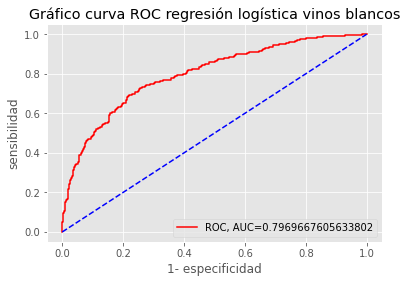

In [ ]:
y_pred_proba = LR.predict_proba(Xb_test)[::,1]
fpr, tpr, _ = roc_curve(yb_test,  y_pred_proba)
auc = roc_auc_score(yb_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc), color="red")
plt.legend(loc=4)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.plot([0,1], [0,1],"b--")
plt.title("Gráfico curva ROC regresión logística vinos blancos")
plt.show()
AUC_b.append(auc)

###Analisis discriminante lineal 📈 📉

Vinos tintos

Usando validación cruzada de 10 iteraciones
	Precisión para el caso de 11 etiquetas: 58.6%
	Precisión para el caso binario: 74.23%
Usando validación de una iteración
	Tasa de aciertos para LDA: 75.0%


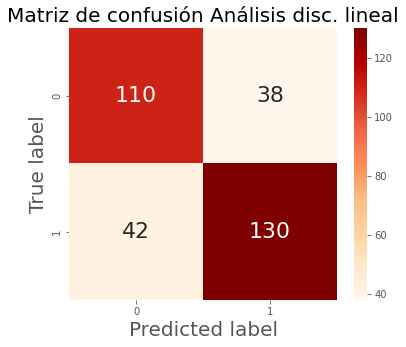

In [ ]:
print("Usando validación cruzada de 10 iteraciones")
scores_lda_t = round(100*np.mean(cross_val_score(lda, Xt, yt, scoring='accuracy', cv = cv, n_jobs=-1)),2)
scores_lda_t_new = round(100*np.mean(cross_val_score(lda, Xt, yt_new, scoring='accuracy', cv = cv, n_jobs=-1)),2)
print("\tPrecisión para el caso de 11 etiquetas: "+str(scores_lda_t)+"%")
print("\tPrecisión para el caso binario: "+str(scores_lda_t_new)+"%")

prec_t.append(scores_lda_t)
precb_t.append(scores_lda_t_new)

print("Usando validación de una iteración")
yt_pred_lda = lda.fit(Xt_train, yt_train).predict(Xt_test)
print("\tTasa de aciertos para LDA: " +str(round(accuracy_score(yt_test,yt_pred_lda)*100,2)) + "%")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yt_test,yt_pred_lda),annot=True,cmap=plt.cm.OrRd,fmt="d", annot_kws={'size': 22})
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.title("Matriz de confusión Análisis disc. lineal",fontsize=20)
plt.show()

Curva ROC

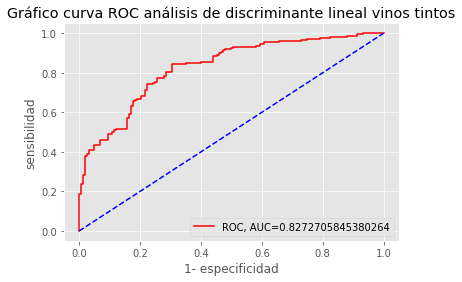

In [ ]:
y_pred_proba = lda.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = roc_curve(yt_test,  y_pred_proba)
auc = roc_auc_score(yt_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc), color="red")
plt.legend(loc=4)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.plot([0,1], [0,1],"b--")
plt.title("Gráfico curva ROC análisis de discriminante lineal vinos tintos")
plt.show()
AUC_t.append(auc)

Vinos blancos

Usando validación cruzada de 10 iteraciones
	Precisión para el caso de 11 etiquetas:  52.23
	Precisión para el caso binario:  74.95
Usando validación de una iteración
	Tasa de aciertos para LDA: 72.96%


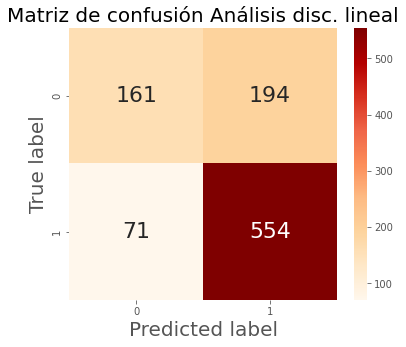

In [ ]:
print("Usando validación cruzada de 10 iteraciones")
scores_lda_b = round(100*np.mean(cross_val_score(lda, Xb, yb, scoring='accuracy', cv = cv, n_jobs=-1)),2)
scores_lda_b_new = round(100*np.mean(cross_val_score(lda, Xb, yb_new, scoring='accuracy', cv = cv, n_jobs=-1)),2)

print("\tPrecisión para el caso de 11 etiquetas: ", scores_lda_b)
print("\tPrecisión para el caso binario: ", scores_lda_b_new)

prec_b.append(scores_lda_b)
precb_b.append(scores_lda_b_new)

print("Usando validación de una iteración")
yb_pred_lda = lda.fit(Xb_train, yb_train).predict(Xb_test)
print("\tTasa de aciertos para LDA: " +str(round(accuracy_score(yb_test,yb_pred_lda)*100,2)) + "%")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yb_test,yb_pred_lda),annot=True,cmap=plt.cm.OrRd,fmt="d", annot_kws={'size':22})
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.title("Matriz de confusión Análisis disc. lineal",fontsize=20)
plt.show()

Curva ROC

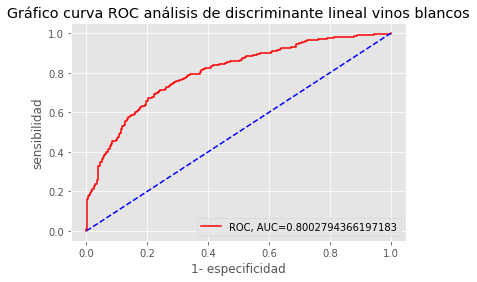

In [ ]:
y_pred_proba = lda.predict_proba(Xb_test)[::,1]
fpr, tpr, _ = roc_curve(yb_test,  y_pred_proba)
auc = roc_auc_score(yb_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc), color="red")
plt.legend(loc=4)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.plot([0,1], [0,1],"b--")
plt.title("Gráfico curva ROC análisis de discriminante lineal vinos blancos")
plt.show()
AUC_b.append(auc)

###Árbol de Decisión 🌳 🎄

Vinos tintos

Usando validación cruzada de 10 iteraciones
	Precisión para el caso de 11 etiquetas: 48.34%
	Precisión para el caso binario: 66.67%
Usando validación de una iteración
	Precisión para el caso binario: 77.5%


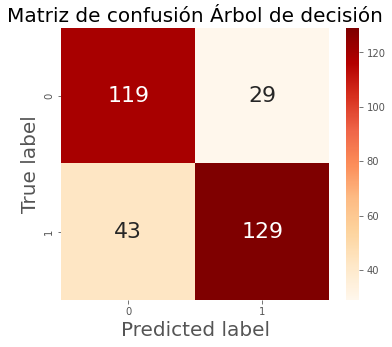

In [ ]:
print("Usando validación cruzada de 10 iteraciones")
scores_dt_t = round(100*np.mean(cross_val_score(dt, Xt, yt, scoring='accuracy', cv = cv, n_jobs=-1)),2)
scores_dt_t_new = round(100*np.mean(cross_val_score(dt, Xt, yt_new, scoring='accuracy', cv = cv, n_jobs=-1)),2) 
print("\tPrecisión para el caso de 11 etiquetas: "+str(scores_dt_t)+"%")
print("\tPrecisión para el caso binario: "+str(scores_dt_t_new)+"%")

prec_t.append(scores_dt_t)
precb_t.append(scores_dt_t_new)

print("Usando validación de una iteración")
yt_pred_dt = dt.fit(Xt_train, yt_train).predict(Xt_test)
print("\tPrecisión para el caso binario: " +str(round(accuracy_score(yt_test,yt_pred_dt)*100,2)) + "%")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yt_test,yt_pred_dt), annot=True,cmap = plt.cm.OrRd, fmt="d", annot_kws={'size': 22})
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.title("Matriz de confusión Árbol de decisión",fontsize=20)
plt.show()

Curva ROC

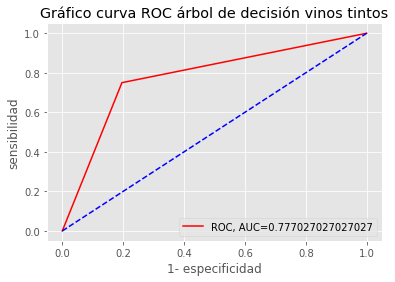

In [ ]:
y_pred_proba = dt.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = roc_curve(yt_test,  y_pred_proba)
auc = roc_auc_score(yt_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc), color="red")
plt.legend(loc=4)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.plot([0,1], [0,1],"b--")
plt.title("Gráfico curva ROC árbol de decisión vinos tintos")
plt.show()
AUC_t.append(auc)

Vinos blancos

Usando validación cruzada de 10 iteraciones
	Precisión para el caso de 11 etiquetas: 41.77%
	Precisión para el caso binario: 68.21%
Usando validación de una iteración
	Precisión para el caso binario: 77.04%


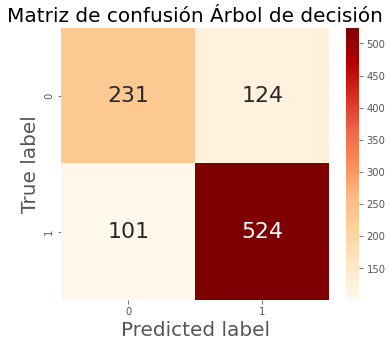

In [ ]:
print("Usando validación cruzada de 10 iteraciones")
scores_dt_b = round(100*np.mean(cross_val_score(dt, Xb, yb, scoring='accuracy', cv = cv, n_jobs=-1)),2)
scores_dt_b_new = round(100*np.mean(cross_val_score(dt, Xb, yb_new, scoring='accuracy', cv = cv, n_jobs=-1)),2)
print("\tPrecisión para el caso de 11 etiquetas: "+str(scores_dt_b)+"%")
print("\tPrecisión para el caso binario: "+str(scores_dt_b_new)+"%")

prec_b.append(scores_dt_b)
precb_b.append(scores_dt_b_new)

print("Usando validación de una iteración")
yb_pred_dt = dt.fit(Xb_train, yb_train).predict(Xb_test)
print("\tPrecisión para el caso binario: " +str(round(accuracy_score(yb_test,yb_pred_dt)*100,2)) + "%")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yb_test,yb_pred_dt),annot=True,cmap=plt.cm.OrRd,fmt="d", annot_kws={'size': 22})
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.title("Matriz de confusión Árbol de decisión",fontsize=20)
plt.show()

Curva ROC

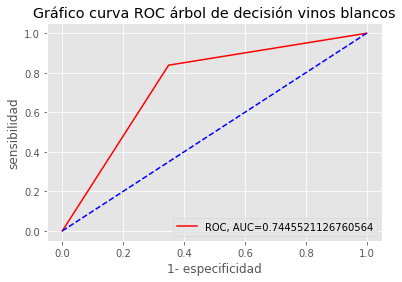

In [ ]:
y_pred_proba = dt.predict_proba(Xb_test)[::,1]
fpr, tpr, _ = roc_curve(yb_test,  y_pred_proba)
auc = roc_auc_score(yb_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc), color="red")
plt.legend(loc=4)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.plot([0,1], [0,1],"b--")
plt.title("Gráfico curva ROC árbol de decisión vinos blancos")
plt.show()
AUC_b.append(auc)

#Resumen de resultados 📊

Vinos Tintos

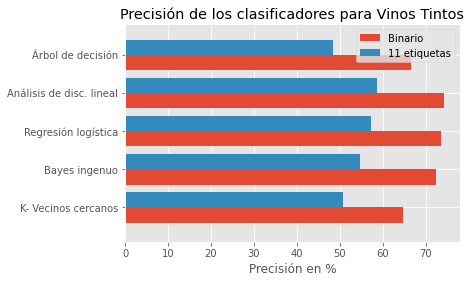

In [ ]:
ind = np.arange(5)
width = 0.40

fig, ax = plt.subplots()
ax.barh(ind, precb_t, width, label='Binario')
ax.barh(ind + width, prec_t, width, label='11 etiquetas')

ax.set(yticks=ind+width/2, yticklabels=clasificadores, ylim=[2*width - 1.5, 5])
ax.legend()

plt.xlabel('Precisión en %')
plt.title('Precisión de los clasificadores para Vinos Tintos')
plt.show()

Vinos blancos

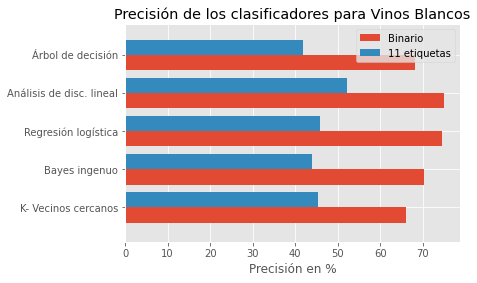

In [ ]:
ind = np.arange(5)
width = 0.40

fig, ax = plt.subplots()
ax.barh(ind, precb_b, width, label='Binario')
ax.barh(ind + width, prec_b, width, label='11 etiquetas')

ax.set(yticks=ind+width/2, yticklabels=clasificadores, ylim=[2*width - 1.5, 5])
ax.legend()

plt.xlabel('Precisión en %')
plt.title('Precisión de los clasificadores para Vinos Blancos')
plt.show()

A continuación se crea un DataFrame a modo de resumen de los resultados, incluyendo por ejemplo las AUC y las precisiones de cada modelo para cada *datasets*.

In [ ]:
df = pd.DataFrame()
df["Clasificadores"] = clasificadores
df["Tintos 11 etiquetas"] = prec_t
df["Tintos binario"] = precb_t
df["Blancos 11 etiquetas"] = prec_b
df["Blancos binario"] = precb_b
df["AUC Tintos"] = AUC_t
df["AUC Blancos"] = AUC_b
df.set_index("Clasificadores",inplace = True)

df["dif tintos"] = df["Tintos binario"] - df["Tintos 11 etiquetas"]

df["dif Blancos"] = df["Blancos binario"] - df["Blancos 11 etiquetas"]
df.head(5)

,Tintos 11 etiquetas,Tintos binario,Blancos 11 etiquetas,Blancos binario,AUC Tintos,AUC Blancos,dif tintos,dif Blancos
Clasificadores,,,,,,,,
K- Vecinos cercanos,50.84,64.66,45.37,65.99,0.729926,0.698127,13.82,20.62
Bayes ingenuo,54.78,72.29,43.89,70.25,0.786102,0.746758,17.51,26.36
Regresión logística,57.35,73.55,45.86,74.54,0.825424,0.796967,16.20,28.68
Análisis de disc. lineal,58.60,74.23,52.23,74.95,0.827271,0.800279,15.63,22.72
Árbol de decisión,48.34,66.67,41.77,68.21,0.777027,0.744552,18.33,26.44
